# PLSA
_Probabilistic latent semantic analysis_

## Preliminaries
#### Import dependencies

In [1]:
import sys
import matplotlib.pyplot as plt

#### Set the plotting environment

In [2]:
%matplotlib notebook

#### Put the actual `plsa` package onto the _python path_

In [3]:
sys.path.append('..')

#### Import main classes from the `plsa` package

In [4]:
from plsa import Corpus, Pipeline, Visualize
from plsa.pipeline import DEFAULT_PIPELINE
from plsa.algorithms import PLSA

## Data Sources
As they can be quite large, no actual text corpus is included with the `plsa` package. Two nice examples to play with could be
- [Economic News Article Tone and Relevance](https://www.figure-eight.com/data-for-everyone/)
- [Blog Authorship Corpus](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm)
We are assuming here that you have downloaded one of them (or both) and placed them under a `data` folder under the
root of your clone of the `PLSA` [GitHub repository](https://github.com/yedivanseven/PLSA).

In [5]:
csv_file = '../data/Full-Economic-News-DFE-839861.csv'
directory = '../data/blogs'

## Set Up the Corpus
#### Define pre-processing pipeline
Depending on there source, actual, real-world text documents are "dirty", and need to be "cleaned up" through a series of pre-processing steps. The `plsa` submodule `preprocessors` contains several of them
(see the [API documentation](https://probabilistic-latent-semantic-analysis.readthedocs.io/en/latest/plsa.preprocessors.html)). For convenience, they are assembled into a default pipeline that should help you to get
some results out-of-the-box.

In [6]:
pipeline = Pipeline(*DEFAULT_PIPELINE)
pipeline

Pipeline:
0: remove_non_ascii
1: to_lower
2: remove_numbers
3: tag_remover
4: punctuation_remover
5: tokenize
6: LemmatizeWords
7: RemoveStopwords
8: short_word_remover

#### Load corpus
Execute either this cell ...

In [ ]:
corpus = Corpus.from_xml(directory, pipeline)
corpus

... or that cell:

In [7]:
corpus = Corpus.from_csv(csv_file, pipeline)
corpus

Corpus:
Number of documents: 1000
Number of words:     6431

## Run PLSA

#### Choose the number of topics

In [8]:
n_topics = 5

#### Instantiate a PLSA model

In [9]:
plsa = PLSA(corpus, n_topics)
plsa

PLSA:
====
Number of topics:     5
Number of documents:  1000
Number of words:      6431
Number of iterations: 0

Notice that we did not do any iterations yet.

#### Fit the PLSA model

In [10]:
result = plsa.fit()
plsa

PLSA:
====
Number of topics:     5
Number of documents:  1000
Number of words:      6431
Number of iterations: 116

Now we indeed did do some iterations.

#### Examine the results
Feel free to explore the attributes of the `result` object. See the [API documentation](https://probabilistic-latent-semantic-analysis.readthedocs.io/en/latest/plsa.algorithms.result.html) for more information.

For example, we could see the relative prevalence of the individual topics we found.

In [14]:
result.topic

array([0.24006595, 0.23252009, 0.18058714, 0.18058057, 0.16624625])

Or, we could predict the topic mixture of an entirely new document.

In [21]:
new_doc = 'Hello! this is the federal humpty dumpty agency for state funding.'

topic_components, number_of_new_words, new_words = result.predict(new_doc)

print('Relative topic importance in new document:', topic_components)
print('Number of previously unseen words in new document:', number_of_new_words)
print('Previously unseen words in new document:', new_words)

Relative topic importance in new document: [0.02169139 0.02298968 0.17803073 0.25260122 0.52468698]
Number of previously unseen words in new document: 2
Previously unseen words in new document: ('humpty', 'dumpty')


And, of course, we can look at individual topics, that is, how important which word is for which topic. Let's look at the top-10 words of the first topic.

In [30]:
result.word_given_topic[0][:10]

(('dollar', 0.015554009570217693),
 ('fed', 0.011615770079019034),
 ('bond', 0.010404207015481979),
 ('currency', 0.008672441159920746),
 ('bank', 0.008659501008072168),
 ('rate', 0.008179162398093734),
 ('yen', 0.007815616320173665),
 ('treasury', 0.006461472565254938),
 ('point', 0.006439728056068155),
 ('stock', 0.006439690662670969))

## Visualize the Results

In [22]:
visualize = Visualize(result)
visualize

Visualize:
Number of topics:    5
Number of documents: 5
Number of words:     6431

#### Convergence
Since PLSA use an iterative expectation-maximization (EM) style algorithm, let's make sure we have achieved reasonable convergence.

<IPython.core.display.Javascript object>


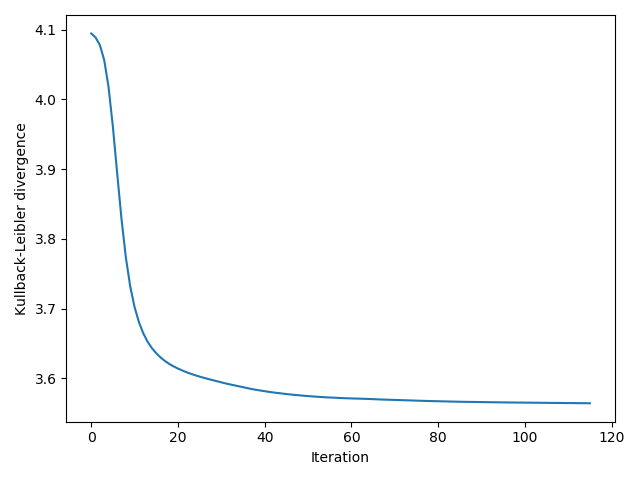

In [23]:
fig, ax = plt.subplots()
_ = visualize.convergence(ax)
fig.tight_layout()

#### Relative topic importance
How important are the topics we found in the corpus?

<IPython.core.display.Javascript object>


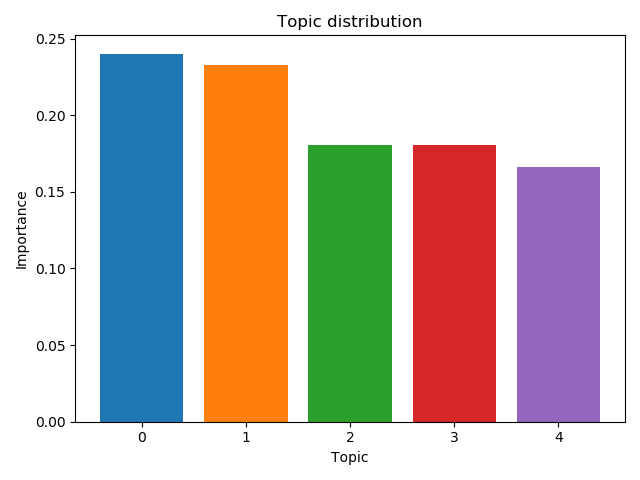

In [25]:
fig, ax = plt.subplots()
_ = visualize.topics(ax)
fig.tight_layout()

#### The topics
The most interesting part is probably the topics themselves, We can visualize them as word clouds.

<IPython.core.display.Javascript object>


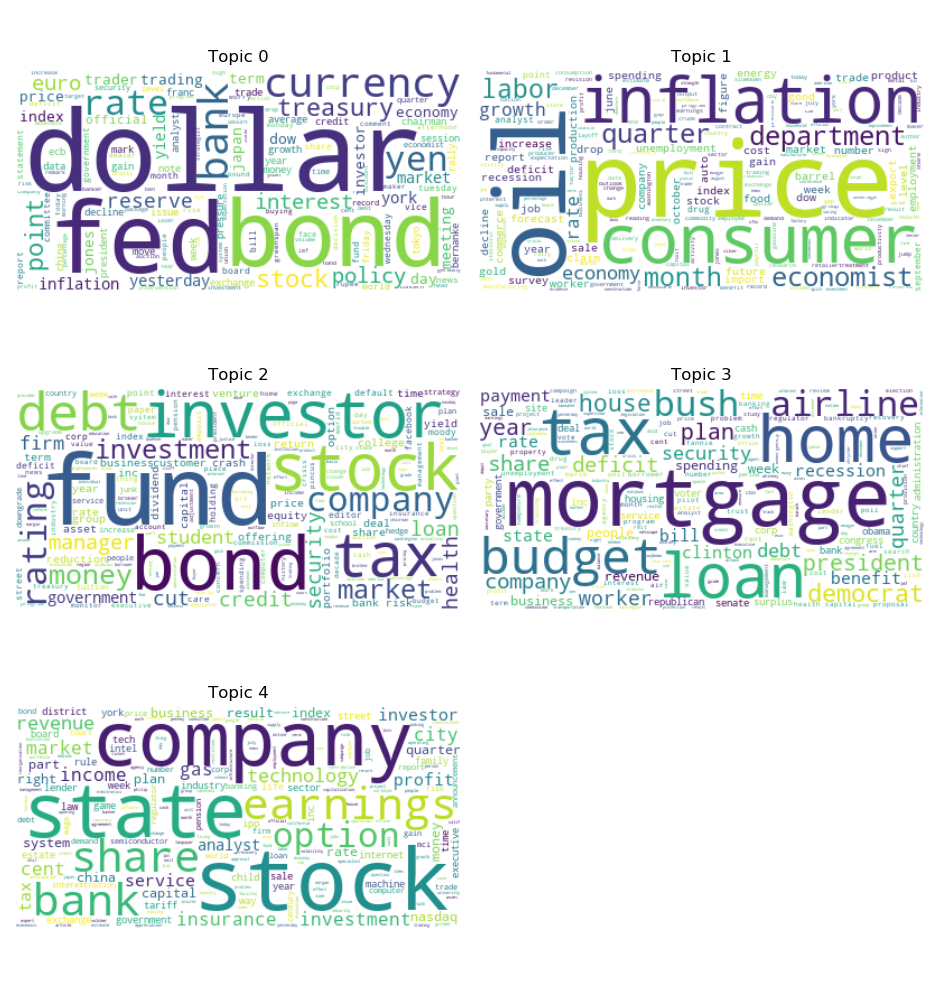

In [31]:
fig = plt.figure(figsize=(9.4, 10))
_ = visualize.wordclouds(fig)

#### Relative topic importance in a document
Also interesting is the mixture of topics in each document. Let's look at the first one.

<IPython.core.display.Javascript object>


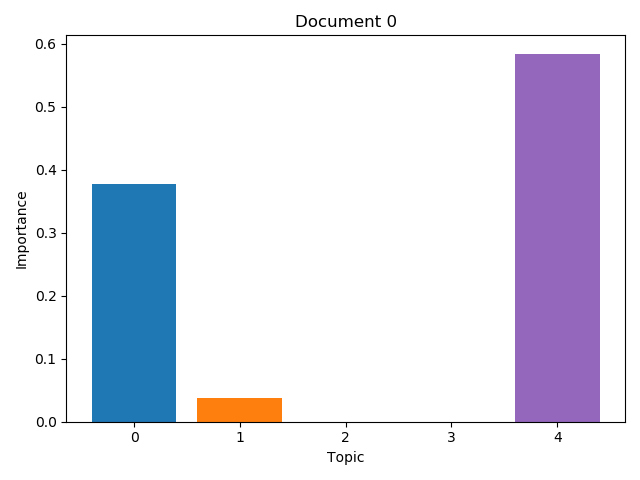

In [35]:
fig, ax = plt.subplots()
_ = visualize.topics_in_doc(0, ax)
fig.tight_layout()

Let's compare this with what the prediction would look like, pretending that this document wasn't seen before.

<IPython.core.display.Javascript object>


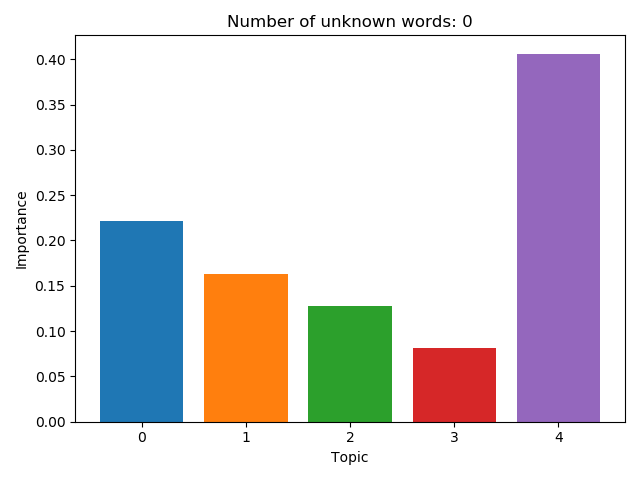

In [36]:
fig, ax = plt.subplots()
_ = visualize.prediction(corpus.raw[0], ax)
fig.tight_layout()

Similar, but not quite the same. This is the very nature of matrix factorization algorithms, to which PLSA can be seen to belong. We try to approxmiate the original counts of each word in each document with a lower-dimensional representation of the data. That's why the topic composition get's somewhat "blurred".

#### Prediction for a new document
We can also visualize the predicited topic composition for a new document.

<IPython.core.display.Javascript object>


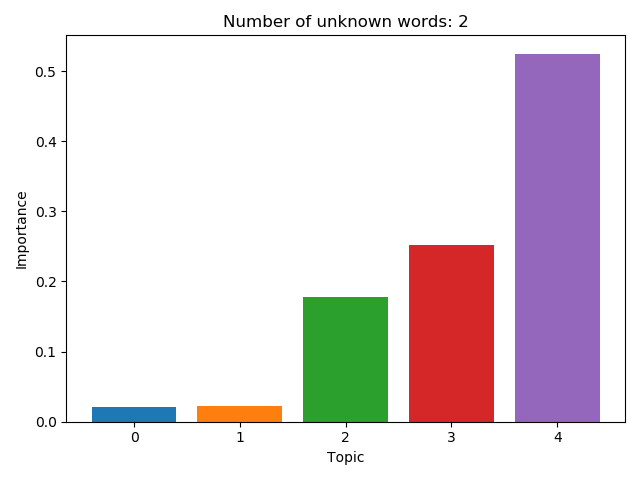

In [37]:
new_doc = 'Hello! this is the federal humpty dumpty agency for state funding.'

fig, ax = plt.subplots()
_ = visualize.prediction(new_doc, ax)
fig.tight_layout()